<a href="https://colab.research.google.com/github/cdixson-ds/DS-Unit-2-Linear-Models/blob/master/LS_DS_232_assignment_sent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

Your code starts here:

In [0]:
import pandas as pd

In [0]:
#1qg7bNIC4RBn-OEsbu7tYHzGYf4p6Hv93


train = pd.read_csv('https://drive.google.com/u/0/uc?id=1qg7bNIC4RBn-OEsbu7tYHzGYf4p6Hv93&export=download')

In [83]:
train.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [0]:
#Test

test = pd.read_csv('https://drive.google.com/u/0/uc?id=1VRohT0ss61yxRNLJnPuR9fG98LHjESqh&export=download')

In [85]:
test.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [0]:
#Valid

valid = pd.read_csv('https://drive.google.com/u/0/uc?id=1pSXQ0pNY3Hmnj9btfZGgPp4bDB_R-JFh&export=download')

In [87]:
valid.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [0]:
#Test

test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTrCSMGXWqolVN-dmOe9bFuViD9osD4ABWBZm_2nOryH6jRzJMlFhePcPiqkJpoyvMWScJevfHGPxfT/pub?output=csv')

In [89]:
test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,when i first read about berlin am meer i didn'...,0


# Choose your target: 

I am trying to predict the 'label' column which determines if the review is
positive or negative

Classification: This is a classification problem because I am attempting to predict a discrete label

Evaluation Metrics: I'm going to 

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [0]:
#train = pd.read_csv('Train.csv')

In [0]:
#target = label

#train.head()

In [0]:
#test = pd.read_csv('Test.csv')

In [0]:
#valid = pd.read_csv('Valid.csv')

In [113]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 7, 4

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Find Distribution: because the distribution is balanced I will use accuracy as an evaluation metric

In [114]:
#Distribution is balanced

train['label'].value_counts(True)

1    0.501
0    0.499
Name: label, dtype: float64

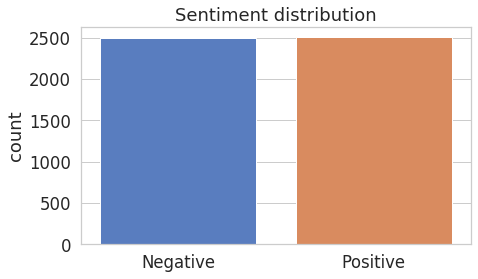

In [115]:
#Distribution bar plot

f = sns.countplot(x = 'label', data=train)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("")
plt.show()

In [116]:
train.groupby('label').describe()

length                                   ... length_clean_review                     
        count         mean          std    min  ...                 25%   50%    75%     max
label                                           ...                                         
0      2495.0  1326.173547   987.000052  111.0  ...                65.0  90.0  144.0   563.0
1      2505.0  1303.065070  1033.130891   67.0  ...                63.0  86.0  142.0  1135.0

[2 rows x 16 columns]

In [117]:
#Create a length column

train['length'] = train['text'].apply(len)
train.head()

,text,label,length,clean_review,length_clean_review
0,I always wrote this series off as being a comp...,0,2105,"[always, wrote, series, complete, stink, fest,...",197
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070,"[st, watched, dir, steve, purcell, typical, ma...",89
2,This movie was so poorly written and directed ...,0,1402,"[movie, poorly, written, directed, fell, aslee...",103
3,The most interesting thing about Miryang (Secr...,1,4277,"[interesting, thing, miryang, secret, sunshine...",401
4,"when i first read about ""berlin am meer"" i did...",0,1013,"[first, read, berlin, meer, expect, much, thou...",87


In [118]:
train.length.describe()

count     5000.000000
mean      1314.596200
std       1010.339949
min         67.000000
25%        706.000000
50%        970.000000
75%       1578.500000
max      12930.000000
Name: length, dtype: float64

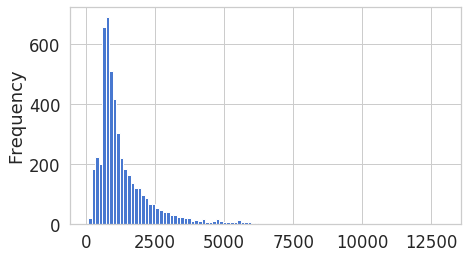

In [119]:
#Length histogram

train['length'].plot.hist(bins = 100)
plt.show()

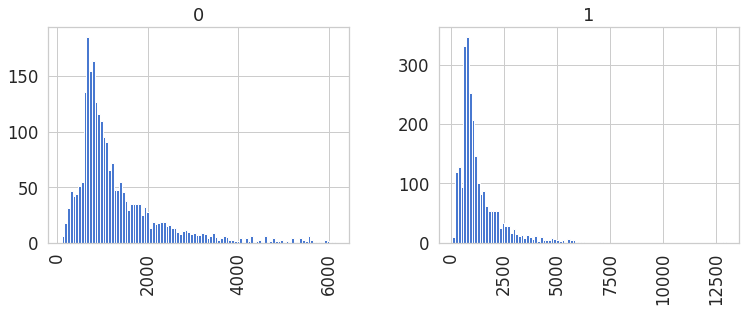

In [120]:
#positive reviews are longer

train.hist(column='length', by='label', bins=100, figsize=(12,4))
plt.show()

Cleaning Data

In [0]:
from bs4 import BeautifulSoup

def clean_text(X):
  #remove HTML tags
  X = BeautifulSoup(X).get_text()

  #remove all non letters from text
  letters_only = re.sub("[^a-zA-Z]", " ", X) 

  #lower case, split words
  words = letters_only.lower().split()

  #stopwords variable
  stops = set(stopwords.words('english'))

  #Remove stop words and return
  return [w for w in words if not w in stops]

In [122]:
#clean text, add word count coloumn

train['clean_review'] = train['text'].apply(clean_text)
train['length_clean_review'] = train['clean_review'].apply(len)
train.head()

,text,label,length,clean_review,length_clean_review
0,I always wrote this series off as being a comp...,0,2105,"[always, wrote, series, complete, stink, fest,...",197
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,1070,"[st, watched, dir, steve, purcell, typical, ma...",89
2,This movie was so poorly written and directed ...,0,1402,"[movie, poorly, written, directed, fell, aslee...",103
3,The most interesting thing about Miryang (Secr...,1,4277,"[interesting, thing, miryang, secret, sunshine...",401
4,"when i first read about ""berlin am meer"" i did...",0,1013,"[first, read, berlin, meer, expect, much, thou...",87


In [124]:
train.describe()

,label,length,length_clean_review
count,5000.000000,5000.000000,5000.000000
mean,0.501000,1314.596200,118.625600
std,0.500049,1010.339949,90.894709
min,0.000000,67.000000,7.000000
25%,0.000000,706.000000,64.000000
50%,1.000000,970.000000,88.000000
75%,1.000000,1578.500000,143.000000
max,1.000000,12930.000000,1135.000000


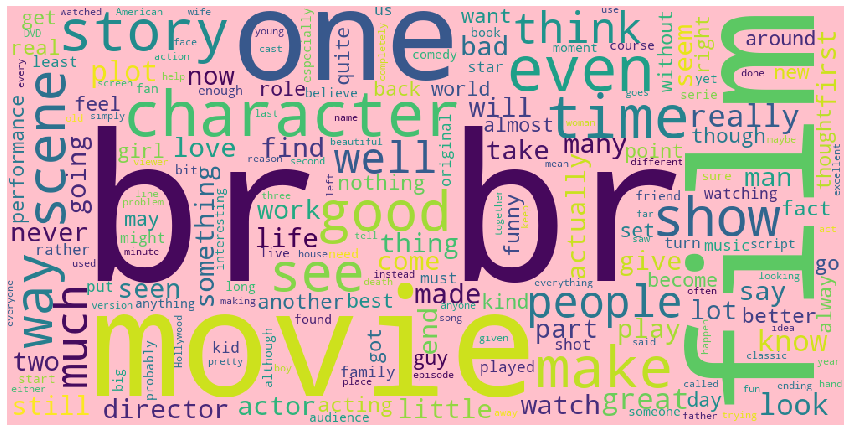

In [106]:
### Word CLoud
#Plot wordcloud
#need to remove stop words and 'br' tag
word_cloud = WordCloud(width = 1000, height = 500, background_color = 'pink').generate(
                        ''.join(train['text']))

plt.figure(figsize = (15,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

#word_cloud.to_file('aa.png')   #for saving file

In [0]:
#Vectorization

from sklearn.feature_extraction.text import CountVectorizer

bow_transform = CountVectorizer(analyzer=clean_text).fit(train['text'])

In [126]:
#print total number of words
print(len(bow_transform.vocabulary_))

38561


In [127]:
#Look at one review

review1 = train['text'][1]
print(review1)

1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be interesting what happens to them if they ever decide to split up and go there own ways. In this episode of their adventures they are interns in Rome for a `fashion' designer who puts them right into the mailroom to learn what working hard is all about(I guess..). Besides the typical flirtations with boys there is nothing much else except the Rome scenario until about ¾ way into the movie when it's finally revealed why they are getting fired, then re-hired, then fired again, then re-hired again. This is definetly made by people who don't understand the corporate world and it shows in their interpretation of it. Maybe the real world will be their next adventure(if there is one.). Even my kids didn't seem to care for this boring `adventure' in the make-believe. Let's see they probably only have a

In [128]:
#Review one in vector form

bow1 = bow_transform.transform([review1])
print(bow1)
print(bow1.shape)

  (0, 461)	1
  (0, 471)	2
  (0, 474)	1
  (0, 1769)	1
  (0, 2956)	1
  (0, 3108)	1
  (0, 3854)	1
  (0, 3980)	1
  (0, 4970)	1
  (0, 7351)	1
  (0, 7483)	1
  (0, 8463)	1
  (0, 8568)	1
  (0, 8904)	1
  (0, 9288)	1
  (0, 10793)	1
  (0, 11247)	1
  (0, 11503)	1
  (0, 11518)	1
  (0, 11615)	1
  (0, 12116)	1
  (0, 12159)	1
  (0, 12541)	1
  (0, 12599)	2
  (0, 12815)	1
  :	:
  (0, 26387)	1
  (0, 26836)	1
  (0, 26896)	1
  (0, 27424)	1
  (0, 28405)	1
  (0, 28615)	1
  (0, 28897)	2
  (0, 29669)	1
  (0, 30047)	2
  (0, 30062)	1
  (0, 30748)	1
  (0, 32072)	1
  (0, 32242)	1
  (0, 32546)	1
  (0, 32892)	1
  (0, 34555)	1
  (0, 34623)	1
  (0, 35567)	2
  (0, 35856)	1
  (0, 37308)	1
  (0, 37367)	1
  (0, 37371)	1
  (0, 38018)	1
  (0, 38029)	2
  (0, 38267)	1
(1, 38561)


In [130]:
print(bow_transform.get_feature_names()[471])  #word at specific index, adventure occurs twice
print(bow_transform.get_feature_names()[26836])  #purcell occurs once

adventure
purcell


In [0]:
#create bow from reviews

review_bow = bow_transform.transform(train['text'])

In [132]:
#Check the shape and non zero occurances

print('Shape of sparse matrix: ', review_bow.shape)
print('Amount of non-zero occurences: ', review_bow.nnz)

Shape of sparse matrix:  (5000, 38561)
Amount of non-zero occurences:  487675


In [133]:
#Check sparsity of sparse matrix

sparsity = 100 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1])
print('sparsity: {}'.format(sparsity))

sparsity: 0.25293690516324785


In [134]:
#Term frequency: how frequently a term is used / length
#IDF: Inverse Document Frequency, measures importance of the term
#rare words have more importance, are scaled up using:
#  IDF(t) = log_e(Total # of reviews/ # of reviews with term t in it)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 38267)	0.05767276908870989
  (0, 38029)	0.12719653995388402
  (0, 38018)	0.08607401130784409
  (0, 37371)	0.08900519874063463
  (0, 37367)	0.04782286739061057
  (0, 37308)	0.06953603218969492
  (0, 35856)	0.07571503356807464
  (0, 35567)	0.1788083751090192
  (0, 34623)	0.10405691188945157
  (0, 34555)	0.11322661082891403
  (0, 32892)	0.08090997691687118
  (0, 32546)	0.10269435272706957
  (0, 32242)	0.10743320438490629
  (0, 32072)	0.12439114846216652
  (0, 30748)	0.06871804031791308
  (0, 30062)	0.07090912149072691
  (0, 30047)	0.08404616691931154
  (0, 29669)	0.11612192309367388
  (0, 28897)	0.27168428625158847
  (0, 28615)	0.06295421481898016
  (0, 28405)	0.11070199447573156
  (0, 27424)	0.05761895631816693
  (0, 26896)	0.10069271448954904
  (0, 26836)	0.1561763796985092
  (0, 26387)	0.06615763434009181
  :	:
  (0, 12815)	0.16058330296198192
  (0, 12599)	0.25962215416021767
  (0, 12541)	0.0763984676654475
  (0, 12159)	0.10811428134501191
  (0, 12116)	0.11612192309367388
  (0, 1

In [136]:
#check what the IDF of the word 'adventure' and 'purcell' is

print(tfidf_transformer.idf_[bow_transform.vocabulary_['adventure']])
print(tfidf_transformer.idf_[bow_transform.vocabulary_['purcell']])

4.9740983891488995
7.907955258984804


In [137]:
#transform the whole bag of words

review_tfidf = tfidf_transformer.transform(review_bow)
print(review_tfidf.shape)

(5000, 38561)


In [0]:
#Predicting & Stats Function
def pred(predicted,compare):
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("Confusion Matrix:")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['text'], train['label'], test_size=0.22, random_state=42)

len(X_train), len(X_test), len(X_train) + len(X_test)

(3900, 1100, 5000)

In [145]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

Confusion Matrix:
col_0     0     1
label            
0      1838   106
1        57  1899

Accuracy :-  95.82

False Negative Rate :-  2.91

False Postive Rate :-  5.45

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1944
           1       0.95      0.97      0.96      1956

    accuracy                           0.96      3900
   macro avg       0.96      0.96      0.96      3900
weighted avg       0.96      0.96      0.96      3900



In [146]:
#Test Set Result
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

Confusion Matrix:
col_0    0    1
label          
0      472   79
1       70  479

Accuracy :-  86.45

False Negative Rate :-  12.75

False Postive Rate :-  14.34

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       551
           1       0.86      0.87      0.87       549

    accuracy                           0.86      1100
   macro avg       0.86      0.86      0.86      1100
weighted avg       0.86      0.86      0.86      1100



In [147]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       542
           1       0.87      0.86      0.87       558

    accuracy                           0.86      1100
   macro avg       0.86      0.86      0.86      1100
weighted avg       0.86      0.86      0.86      1100



In [148]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_test)

0.8645454545454545

In [166]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators = 500)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

Confusion Matrix:
col_0     0     1
label            
0      1944     0
1         0  1956

Accuracy :-  100.0

False Negative Rate :-  0.0

False Postive Rate :-  0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1944
           1       1.00      1.00      1.00      1956

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900



In [150]:
#Test Set Result
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

Confusion Matrix:
col_0    0    1
label          
0      485   66
1       96  453

Accuracy :-  85.27

False Negative Rate :-  17.49

False Postive Rate :-  11.98

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       551
           1       0.87      0.83      0.85       549

    accuracy                           0.85      1100
   macro avg       0.85      0.85      0.85      1100
weighted avg       0.85      0.85      0.85      1100



In [151]:
accuracy_score(predictions, y_test)

0.8527272727272728

In [153]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [158]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', XGBClassifier(n_estimators = 500)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

Confusion Matrix:
col_0     0     1
label            
0      1872    72
1        26  1930

Accuracy :-  97.49

False Negative Rate :-  1.33

False Postive Rate :-  3.7

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1944
           1       0.96      0.99      0.98      1956

    accuracy                           0.97      3900
   macro avg       0.98      0.97      0.97      3900
weighted avg       0.98      0.97      0.97      3900



In [159]:
#Test Set Result
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

Confusion Matrix:
col_0    0    1
label          
0      460   91
1       87  462

Accuracy :-  83.82

False Negative Rate :-  15.85

False Postive Rate :-  16.52

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       551
           1       0.84      0.84      0.84       549

    accuracy                           0.84      1100
   macro avg       0.84      0.84      0.84      1100
weighted avg       0.84      0.84      0.84      1100

